<a href="https://colab.research.google.com/github/maisiasr/Well-Thickness-Diagram/blob/main/Well_Thickness_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WELL THICKNESS DIAGRAM**

---
The code cells below allow you to define the thickness interval of each marker by calculating the difference of top marker depth from the input wells. You could enter age, sequence, or formation marker depending on what you are going to use. The difference might support for stratigraphic interpretation in finding the pattern distribution of each interval from well to well.


In [10]:
#Mount your google drive directory, you don't need to do this if you use your local machine.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                                                    East Simpson 2  ...  Walakpa 2 
TOP                                                                 ...            
Recent                                                        17.0  ...        17.0
Surficial Deposits and/or Gubik Formation                     63.0  ...        33.0
Shale of the Colville Group                                  965.0  ...         0.0
Nanushuk Group                                              1655.0  ...         0.0
Torok Formation                                             3625.0  ...      2155.0
Pebble Shale Unit                                            200.0  ...       435.0
Kingak Shale                                                   0.0  ...      1205.0
Sag River Sandstone                                          245.0  ...        40.0
Shublik Formation                                            380.0  ...       415.0
Fire Creek Siltstone Member of the Ivishak Form...             0.0  ...     

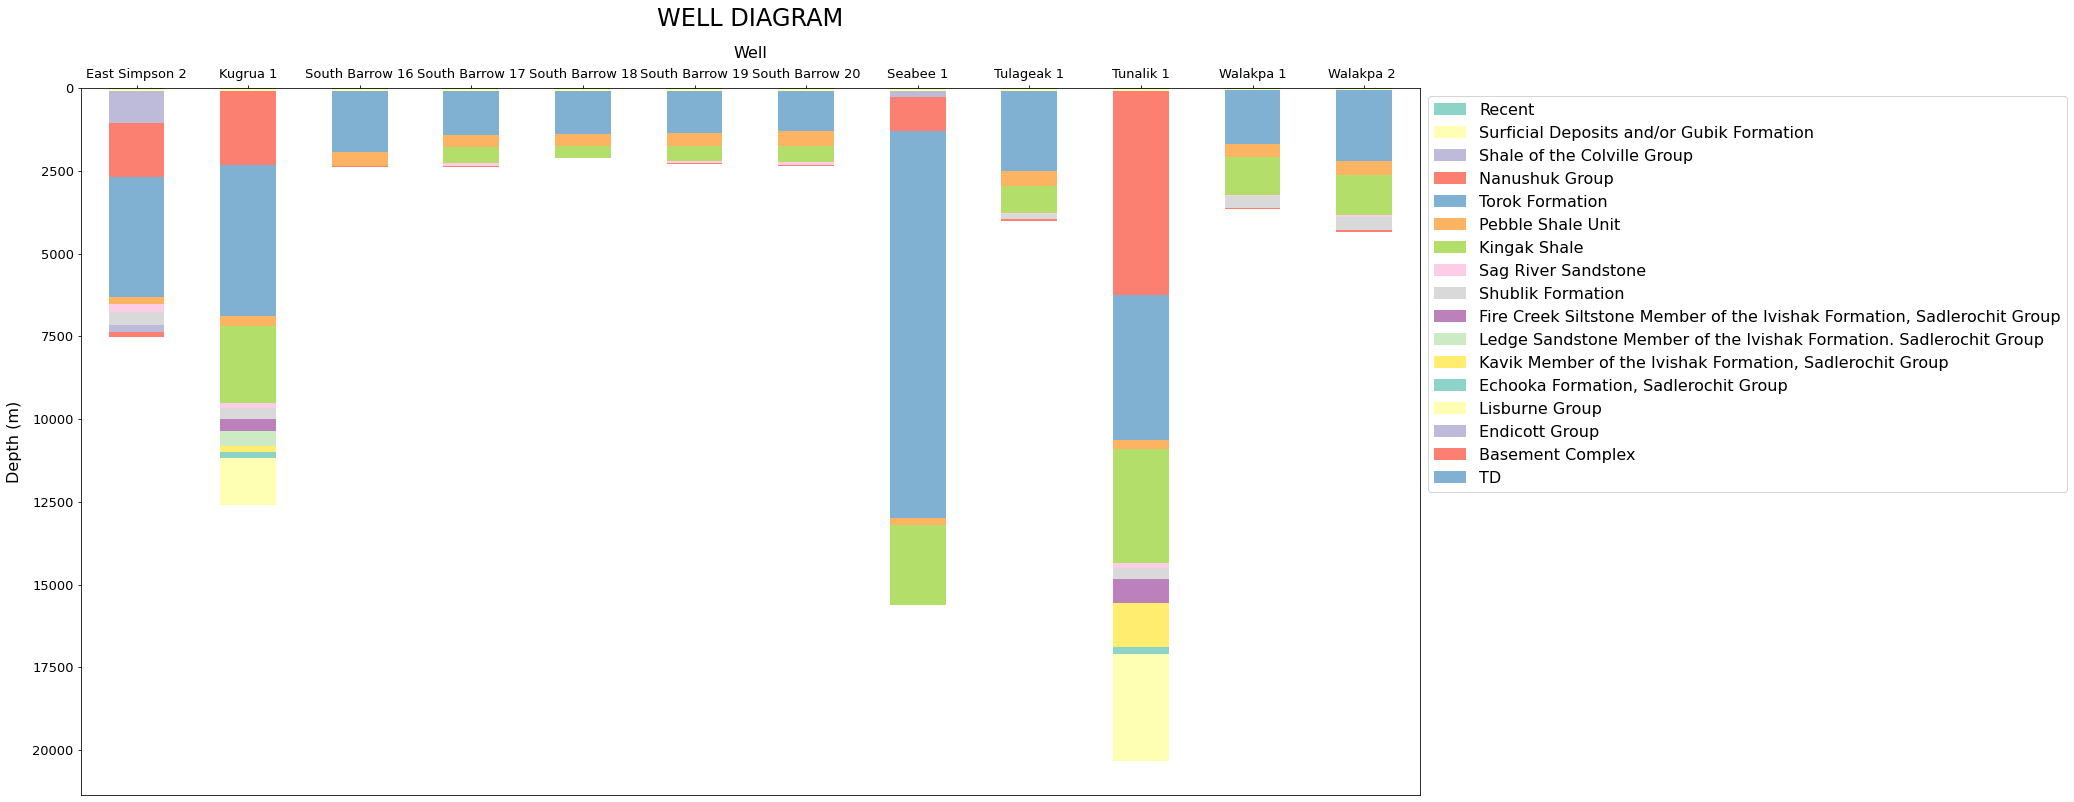

In [21]:
#Import all dependencies and stretch the data limit
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Function of input and output datafile
#source_dir = directory of data
#wellstickfile = Tops data for multiple wells
#outfile = Output of the interval
source_dir = '/content/drive/MyDrive/ALASKA'
wellstickfile = 'ALASKA TOPS.txt'
outfile = '/content/drive/MyDrive/ALASKA/alaskathickness.csv'
outfileimg = '/content/drive/MyDrive/ALASKA/alaskadiagram.jpg'
data = pd.read_csv(f"{source_dir}/{wellstickfile}", sep='\t', index_col=0)

#dataframe
df = pd.DataFrame(data)
difference = df.diff(axis=0)
df2 = pd.DataFrame(difference)
df2 = df2.shift(periods=-1)
print(df2)

#transpose
df2 = df2.T
print(df2)

#colormap
pal = sns.color_palette("Set3")

#plot dataframe
df2.plot(kind='bar', stacked=True, figsize=(24, 13), color=pal)

#set axis chart
ax = plt.gca()
ax.legend(bbox_to_anchor=(1, 1), fontsize=16)
ax.invert_yaxis()
ax.tick_params(bottom=False, labelbottom=False, top=True, labeltop=True, labelsize=13)
ax.set_title("WELL DIAGRAM", pad=20, fontsize=24)
ax.set_xlabel(xlabel="Well", labelpad=10, fontsize=16)
ax.set_ylabel(ylabel="Depth (m)", labelpad=10, fontsize=16)
ax.xaxis.set_label_position("top")
plt.savefig(outfileimg, dpi=300, bbox_inches='tight')
plt.show()
df2.to_csv(outfile)